In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import glob
import argparse

In [2]:
np.set_printoptions(suppress=True)

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# (8,6) is for the given testing images.
# If you use the another data (e.g. pictures you take by your smartphone), 
# you need to set the corresponding numbers.
corner_x = 8
corner_y = 7
objp = np.zeros((corner_x*corner_y,3), np.float32)
objp[:,:2] = np.mgrid[0:corner_x, 0:corner_y].T.reshape(-1,2)
block_len = 2.5
objp = objp * block_len

In [4]:
_depth_mtx = np.mat([
    [211.78734743, 0, 117.65755014],
    [0, 211.60443122, 87.02191618],
    [0, 0, 1. ]])
_depth_dist = np.mat([[-1.79341292e-02 ,-1.88867100e+00, -2.02313569e-04, -4.28223089e-03
   ,3.24046539e+00]])

# 0208
# _RGB_mtx = np.mat([[941.09129171,   0.,         638.94641198  ],
#  [  0.,         939.71879681, 364.60682026],
#  [  0.,           0.,           1.        ]])

# _RGB_dist =  np.mat([[ 0.32649104, -1.06727582, -0.0025263,  -0.00531191,  1.09671098]])

_RGB_mtx = np.mat([[920.41554065,   0.,         640.42506415 ],
 [  0.,         919.25718514, 359.86335889],
 [  0.,           0.,           1.        ]])

_RGB_dist =  np.mat([[ 0.21651283, -0.6450563,  -0.00425079, -0.00337746,  0.56010408]])

find the chessboard corners of
70.4848 27.576654
[[ -8.62510223]
 [-10.94345271]
 [ 37.99515697]]
[[ -0.2228022   -8.62510223  -0.19894813 -10.94345271  -0.02057377
   37.99515697]]


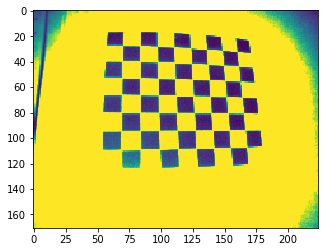

In [5]:
_objpoints = []
_imgpoints = []

_R = []
_T = []

# Test image with known cameramatrix
img = cv2.imread('depth_chessboard_data/0213/01.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
img_size = (img.shape[1], img.shape[0])

#Find the chessboard corners
print('find the chessboard corners of')
ret, imgpoints = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)

# #criteria:角點精準化迭代過程的終止條件
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# #執行亞畫素級角點檢測
# imgpoints = cv2.cornerSubPix(gray,imgpoints,(11,11),(-1,-1),criteria)

print(imgpoints[0,0,0], imgpoints[0,0,1])

_objpoints.append(objp)
_imgpoints.append(imgpoints)


retval, rvecs, tvecs = cv2.solvePnP(objp, imgpoints, _depth_mtx, _depth_dist)

_dept_Vr = np.array(rvecs)
_dept_Tr = np.array(tvecs)

_R.append(_dept_Vr)
_T.append(_dept_Tr)

_dept_extrinsics = np.concatenate((_dept_Vr, _dept_Tr), axis=1).reshape(-1,6)
print(_dept_Tr)
print(_dept_extrinsics)

find the chessboard corners of
446.48807 241.60518
[[-8.45582188]
 [-5.17025205]
 [40.73576548]]
[[-0.31289931 -8.45582188 -0.18530164 -5.17025205 -0.01660934 40.73576548]]


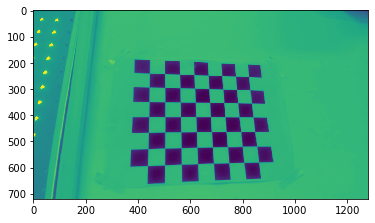

In [6]:
_RGBimgpoints = []

_RGB_R = []
_RGB_T = []

# Test image with known cameramatrix
img = cv2.imread('camera_chessboard_data/0213/01.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
img_size = (img.shape[1], img.shape[0])

#Find the chessboard corners
print('find the chessboard corners of')
ret, RGBimgpoints = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)

#criteria:角點精準化迭代過程的終止條件
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
#執行亞畫素級角點檢測
RGBimgpoints = cv2.cornerSubPix(gray,RGBimgpoints,(11,11),(-1,-1),criteria)

print(RGBimgpoints[0,0,0], RGBimgpoints[0,0,1])

_RGBimgpoints.append(RGBimgpoints)


retval, RGB_rvecs, RGB_tvecs = cv2.solvePnP(objp, RGBimgpoints, _RGB_mtx, _RGB_dist)

_RGB_Vr = np.array(RGB_rvecs)
_RGB_Tr = np.array(RGB_tvecs)

_RGB_R.append(_RGB_Vr)
_RGB_T.append(_RGB_Tr)
    
RGB_extrinsics = np.concatenate((_RGB_Vr, _RGB_Tr), axis=1).reshape(-1,6)
print(_RGB_Tr)
print(RGB_extrinsics)

In [7]:
print('=== Result ===')
ret, RGB_cam_int, RGB_cam_dist, depth_cam_int, depth_cam_dist, depth_rgb_rmat, depth_rgb_tvec, E, F = cv2.stereoCalibrate(
    _objpoints, _RGBimgpoints, _imgpoints, _RGB_mtx, _RGB_dist, _depth_mtx, _depth_dist, None)

print('  RMS :', ret)
print('  Depth Camera intrinsic parameters :')
print(depth_cam_int, '    ')
print('  Depth Camera distortion parameters :')
print(depth_cam_dist, '    ')
print('  RGB Camera intrinsic parameters :')
print(RGB_cam_int, '    ')
print('  RGB Camera distortion parameters :')
print(RGB_cam_dist, '    ')
print('  Rotation matrix / translation vector from RGB camera to depth camera')
print('  (they translate points from depth camera coord to RGB camera coord) :')
print(depth_rgb_rmat, '    ')
print(depth_rgb_tvec, '    ')
print()
print('Rotation vector')
v,_ = cv2.Rodrigues(depth_rgb_rmat)
print(v)

=== Result ===
  RMS : 0.31174873586321666
  Depth Camera intrinsic parameters :
[[211.78734743   0.         117.65755014]
 [  0.         211.60443122  87.02191618]
 [  0.           0.           1.        ]]     
  Depth Camera distortion parameters :
[[-0.01793413 -1.888671   -0.00020231 -0.00428223  3.24046539]]     
  RGB Camera intrinsic parameters :
[[920.41554065   0.         640.42506415]
 [  0.         919.25718514 359.86335889]
 [  0.           0.           1.        ]]     
  RGB Camera distortion parameters :
[[ 0.21651283 -0.6450563  -0.00425079 -0.00337746  0.56010408]]     
  Rotation matrix / translation vector from RGB camera to depth camera
  (they translate points from depth camera coord to RGB camera coord) :
[[ 0.99987952 -0.00718426 -0.01375984]
 [ 0.00592315  0.99596067 -0.08959493]
 [ 0.01434793  0.08950263  0.99588323]]     
[[ 0.35307386]
 [-2.09428202]
 [-1.98883421]]     

Rotation vector
[[ 0.08967251]
 [-0.0140733 ]
 [ 0.00656276]]


In [8]:
import math
# //calculate rotation angles
theta = cv2.norm(v)
theta = (float)(math.sqrt(v[0]*v[0] + v[1]*v[1] + v[2] *v[2])*180/math.pi);

#     transformed to quaterniond
q = np.zeros((4))
q[0] = math.cos(theta / 2)
q[1] = math.sin(theta / 2)*v[0] / theta
q[2] = -math.sin(theta / 2)*v[1] / theta
q[3] = math.sin(theta / 2)*v[2] / theta

print(q, theta)


ysqr = q[2] * q[2];

# // pitch (x-axis rotation)
t0 = +2.0 * (q[0] * q[1] + q[2] *q[3])
t1 = +1.0 - 2.0 * (q[1] * q[1] + ysqr)
pitch = math.atan2(t0, t1)

# // yaw (y-axis rotation)
t2 = +2.0 * (q[0] * q[2] - q[3] * q[1])
if t2 > 1.0:
    t2 = 1.0
if t2 < -1.0:
    t2 = -1.0
yaw = math.asin(t2)

# // roll (z-axis rotation)
t3 = +2.0 * (q[0] * q[3] + q[1] * q[2])
t4 = +1.0 - 2.0 * (ysqr + q[3] * q[3])
roll = math.atan2(t3, t4)

print(pitch,yaw,roll)

[-0.86055799  0.00875951  0.00137473  0.00064107] 5.214320942622657
-0.015075604630454294 -0.002377298699262135 -0.0010792807728375697


Show the camera extrinsics


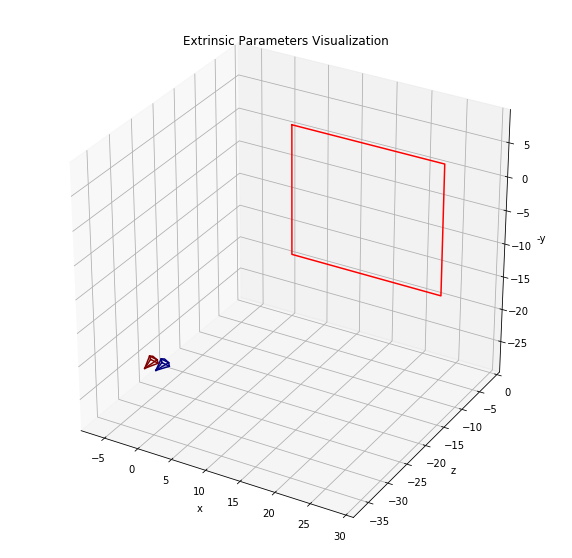

In [9]:
import camera_calibration_show_extrinsics as show
# show the camera extrinsics
print('Show the camera extrinsics')
_Depthcamera_extrinsics = np.concatenate((_R, _T), axis=1).reshape(-1,6)
_RGBcamera_extrinsics = np.concatenate((_RGB_R, _RGB_T), axis=1).reshape(-1,6)
# plot setting
# You can modify it for better visualization
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
# camera setting
camera_matrix = RGB_cam_int
cam_width = 0.064/0.1
cam_height = 0.032/0.1
scale_focal = 1600
# chess board setting
board_width = 9
board_height = 8
square_size = 2.5

Allextrinsics = np.zeros((_Depthcamera_extrinsics.shape[0]+_RGBcamera_extrinsics.shape[0],6))
Allextrinsics[:_Depthcamera_extrinsics.shape[0]] = _Depthcamera_extrinsics
Allextrinsics[_Depthcamera_extrinsics.shape[0]:] = _RGBcamera_extrinsics


# display
# True -> fix board, moving cameras
# False -> fix camera, moving boards
min_values, max_values = show.draw_camera_boards(ax, camera_matrix, cam_width, cam_height,
                                                scale_focal, Allextrinsics, board_width,
                                                board_height, square_size, True)

# _min_values, _max_values = show.draw_camera_boards(ax, RGB_cam_int, cam_width, cam_height,
#                                                 scale_focal, RGB_extrinsics, board_width,
#                                                 board_height, square_size, True)

X_min = min_values[0]
X_max = max_values[0]
Y_min = min_values[1]
Y_max = max_values[1]
Z_min = min_values[2]
Z_max = max_values[2]
max_range = np.array([X_max-X_min, Y_max-Y_min, Z_max-Z_min]).max() / 2.0

mid_x = (X_max+X_min) * 0.5
mid_y = (Y_max+Y_min) * 0.5
mid_z = (Z_max+Z_min) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, 0)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('-y')
ax.set_title('Extrinsic Parameters Visualization')
plt.show()

In [10]:
# === Result ===  0208
#   RMS : 1.2473720008590585
#   Depth Camera intrinsic parameters :
# [[211.78734743   0.         117.65755014]
#  [  0.         211.60443122  87.02191618]
#  [  0.           0.           1.        ]]     
#   Depth Camera distortion parameters :
# [[-0.01793413 -1.888671   -0.00020231 -0.00428223  3.24046539]]     
#   RGB Camera intrinsic parameters :
# [[913.24145912   0.         668.9538477 ]
#  [  0.         905.10342204 389.24919723]
#  [  0.           0.           1.        ]]     
#   RGB Camera distortion parameters :
# [[ 0.25755514 -0.92817129  0.00150453  0.01340316  1.17293952]]     
#   Rotation matrix / translation vector from RGB camera to depth camera
#   (they translate points from depth camera coord to RGB camera coord) :
# [[ 0.99751063  0.02130194  0.06722187]
#  [-0.0229346   0.99945814  0.02360996]
#  [-0.0666825  -0.02509289  0.99745867]]     
# [[ 0.66874471]
#  [-2.4041597 ]
#  [-1.24035753]]     

# Rotation vector
# [[-0.02437406]
#  [ 0.06701444]
#  [-0.02213884]]

In [11]:
# === Result ===
#   RMS : 1.3460909073520595
#   Depth Camera intrinsic parameters :
# [[211.78734743   0.         117.65755014]
#  [  0.         211.60443122  87.02191618]
#  [  0.           0.           1.        ]]     
#   Depth Camera distortion parameters :
# [[-0.01793413 -1.888671   -0.00020231 -0.00428223  3.24046539]]     
#   RGB Camera intrinsic parameters :
# [[913.24145912   0.         668.9538477 ]
#  [  0.         905.10342204 389.24919723]
#  [  0.           0.           1.        ]]     
#   RGB Camera distortion parameters :
# [[ 0.25755514 -0.92817129  0.00150453  0.01340316  1.17293952]]     
#   Rotation matrix / translation vector from RGB camera to depth camera
#   (they translate points from depth camera coord to RGB camera coord) :
# [[ 0.99861337  0.04133541  0.03259935]
#  [-0.03981607  0.99814975 -0.04595392]
#  [-0.03443855  0.04459222  0.9984115 ]]     
# [[ 0.60301485]
#  [-2.90604708]
#  [-3.32166245]]     

# Rotation vector
# [[ 0.04530951]
#  [ 0.03354593]
#  [-0.0406084 ]]